* Dan Shea
* 2017.04.03
* SNP-Analysis - Generate statistical data and plots based on variant calling data of R09 and S11 sequence information mapped to the _B. rapa_ var. Chiifu reference genome

In [1]:
# We want pandas to load in data frames
import pandas as pd

In [2]:
# We want gzip library because we store the large files in gzip compressed format
import gzip

In [3]:
# We need matplotlib for plotting the data
from matplotlib import pyplot as plt

In [4]:
# Numpy for some additional utility while plotting
import numpy as np

In [5]:
# Inline plots for now
%matplotlib inline

In [6]:
# Read in all the data files, store them as DataFrames
R09File  = 'R09-homozygous-variants.tsv.gz'
S11File  = 'S11-homozygous-variants.tsv.gz'
R09FH    = gzip.open(R09File, 'rt')
S11FH    = gzip.open(S11File, 'rt')
R09      = pd.read_table(R09FH)
S11      = pd.read_table(S11FH)

In [7]:
# Check R09 looks OK
R09

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,R09
0,A01,1533,.,A,C,84.26360,.,DP=9;VDB=0.251321;SGB=-0.590765;MQSB=1;MQ0F=0;...,GT:PL,"1/1:117,15,0"
1,A01,1550,.,A,G,98.13300,.,DP=6;VDB=0.036809;SGB=-0.616816;MQSB=0.5;MQ0F=...,GT:PL,"1/1:131,18,0"
2,A01,1565,.,T,A,79.26360,.,DP=6;VDB=0.0643982;SGB=-0.590765;MQSB=1;MQ0F=0...,GT:PL,"1/1:112,15,0"
3,A01,1601,.,G,A,28.77010,.,DP=2;VDB=0.02;SGB=-0.453602;MQ0F=0;AF1=1;AC1=2...,GT:PL,"1/1:60,6,0"
4,A01,1814,.,A,G,15.87790,.,DP=3;VDB=0.38;SGB=-0.453602;MQ0F=0;AF1=1;AC1=2...,GT:PL,"1/1:47,6,0"
5,A01,4554,.,T,G,21.79310,.,DP=3;VDB=0.6;SGB=-0.453602;MQ0F=0;AF1=1;AC1=2;...,GT:PL,"1/1:53,6,0"
6,A01,4555,.,G,C,21.79310,.,DP=3;VDB=0.64;SGB=-0.453602;MQ0F=0;AF1=1;AC1=2...,GT:PL,"1/1:53,6,0"
7,A01,4582,.,T,C,21.79310,.,DP=2;VDB=0.38;SGB=-0.453602;MQ0F=0;AF1=1;AC1=2...,GT:PL,"1/1:53,6,0"
8,A01,4657,.,C,T,88.06580,.,DP=7;VDB=0.291224;SGB=-0.636426;MQ0F=0;AF1=1;A...,GT:PL,"1/1:121,21,0"
9,A01,4684,.,A,G,152.00700,.,DP=11;VDB=0.251186;SGB=-0.670168;MQSB=0.75;MQ0...,GT:PL,"1/1:185,30,0"


In [8]:
# Check S11 looks OK
S11

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,S11
0,A01,1379,.,T,C,77.2635,.,DP=5;VDB=0.956997;SGB=-0.590765;MQSB=0.833333;...,GT:PL,"1/1:110,15,0"
1,A01,1404,.,C,T,31.9747,.,DP=3;VDB=0.275636;SGB=-0.511536;MQSB=1;MQ0F=0;...,GT:PL,"1/1:64,9,0"
2,A01,1533,.,A,C,142.0320,.,DP=10;VDB=0.0510515;SGB=-0.651104;MQSB=0.60053...,GT:PL,"1/1:175,24,0"
3,A01,1550,.,A,G,131.0660,.,DP=10;VDB=0.112445;SGB=-0.636426;MQSB=0.607698...,GT:PL,"1/1:164,21,0"
4,A01,1814,.,A,G,15.8779,.,DP=2;VDB=0.9;SGB=-0.453602;MQ0F=0;AF1=1;AC1=2;...,GT:PL,"1/1:47,6,0"
5,A01,4684,.,A,G,84.2636,.,DP=8;VDB=0.0615984;SGB=-0.590765;MQSB=0.333333...,GT:PL,"1/1:117,15,0"
6,A01,4935,.,T,C,31.9747,.,DP=3;VDB=0.961028;SGB=-0.511536;MQ0F=0;AF1=1;A...,GT:PL,"1/1:64,9,0"
7,A01,4960,.,C,A,21.7931,.,DP=2;VDB=0.18;SGB=-0.453602;MQ0F=0;AF1=1;AC1=2...,GT:PL,"1/1:53,6,0"
8,A01,5070,.,G,A,67.5132,.,DP=4;VDB=0.579441;SGB=-0.556411;MQSB=1;MQ0F=0;...,GT:PL,"1/1:100,12,0"
9,A01,5354,.,C,T,105.0320,.,DP=10;VDB=0.109528;SGB=-0.651104;MQ0F=0;AF1=1;...,GT:PL,"1/1:138,24,0"


In [9]:
R09_INDELS = R09[R09.INFO.str.startswith('INDEL')]

In [10]:
S11_INDELS = S11[S11.INFO.str.startswith('INDEL')]

In [11]:
Chromosomes = ['A01','A02','A03','A04','A05','A06','A07','A08','A09','A10',]

In [12]:
R09_Chromosomes = {key: 0 for key in Chromosomes}
S11_Chromosomes = {key: 0 for key in Chromosomes}

In [13]:
for chromosome in R09_Chromosomes:
    R09_Chromosomes[chromosome] = sum(R09.CHROM == chromosome)
    S11_Chromosomes[chromosome] = sum(S11.CHROM == chromosome)

In [14]:
R09_Chromosomes

{'A01': 104970,
 'A02': 71035,
 'A03': 114843,
 'A04': 81921,
 'A05': 92568,
 'A06': 130984,
 'A07': 123751,
 'A08': 131899,
 'A09': 128595,
 'A10': 67126}

In [15]:
S11_Chromosomes

{'A01': 89296,
 'A02': 99934,
 'A03': 117461,
 'A04': 104013,
 'A05': 111523,
 'A06': 116174,
 'A07': 110448,
 'A08': 90259,
 'A09': 149280,
 'A10': 69667}

In [16]:
R09_Chromosomes_pct = R09_Chromosomes.copy()
S11_Chromosomes_pct = S11_Chromosomes.copy()
for chromosome in R09_Chromosomes:
    R09_Chromosomes_pct[chromosome] = R09_Chromosomes[chromosome] / R09.shape[0]
    S11_Chromosomes_pct[chromosome] = S11_Chromosomes[chromosome] / S11.shape[0]

In [17]:
R09_Chromosomes_pct

{'A01': 0.10019165938081039,
 'A02': 0.067801414919651956,
 'A03': 0.1096152304303173,
 'A04': 0.078191873184103727,
 'A05': 0.088354210970399694,
 'A06': 0.12502147577723224,
 'A07': 0.11811772925630815,
 'A08': 0.12589482405134333,
 'A09': 0.1227412254746624,
 'A10': 0.064070356555170793}

In [18]:
S11_Chromosomes_pct

{'A01': 0.084396368808804842,
 'A02': 0.094450666553251017,
 'A03': 0.11101596797898029,
 'A04': 0.098305853665452178,
 'A05': 0.10540378335719788,
 'A06': 0.10979958508773173,
 'A07': 0.10438776812169499,
 'A08': 0.08530652943372509,
 'A09': 0.14108907381941393,
 'A10': 0.065844403173748053}

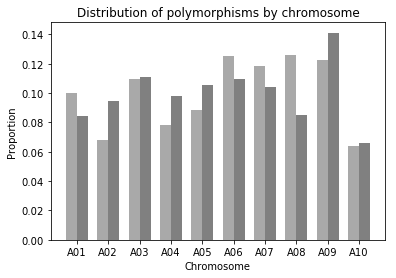

In [19]:
# Make a side-by-side bar plot showing the distribution of polymorphisms found on each chromosome
# for the R09 and S11 genome mappings.
ind = np.arange(len(R09_Chromosomes_pct)) # the x locations for the groups
width = 0.35                                    # the width of the bars
fig, ax = plt.subplots()
R09_rects = ax.bar(ind, R09_Chromosomes_pct.values(), width, color='darkgray')
S11_rects = ax.bar(ind+width, S11_Chromosomes_pct.values(), width, color='gray')
ax.set_title('Distribution of polymorphisms by chromosome')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(list(R09_Chromosomes_pct), rotation=0)
ax.set_xlabel('Chromosome')
ax.set_ylabel('Proportion')

#def autolabel(rects):
#    """
#    Attach a text label above each bar displaying its height
#    """
#    for rect in rects:
#        height = rect.get_height()
#        ax.text(rect.get_x() + rect.get_width()/2., height,
#                '{}'.format(int(height)),
#                ha='left', va='bottom', rotation=45)

#autolabel(R09_rects)
#autolabel(S11_rects)

plt.savefig('Polymorphisms_by_chromosome.png', dpi=300, bbox_inches='tight')
plt.show()

In [20]:
R09_SNPs = R09[R09.INFO.str.startswith('DP=')]
S11_SNPs = S11[S11.INFO.str.startswith('DP=')]

In [21]:
# 2017.04.08 - Fujimoto-sensei requested only SNPs by chromosome
# So, I have added code here to calculate and plot that data
R09_SNP_per_chromosome_counts = {'A01': 0, 'A02': 0, 'A03': 0, 'A04': 0, 'A05': 0,
                             'A06': 0, 'A07': 0, 'A08': 0, 'A09': 0, 'A10': 0,}
S11_SNP_per_chromosome_counts = {'A01': 0, 'A02': 0, 'A03': 0, 'A04': 0, 'A05': 0,
                             'A06': 0, 'A07': 0, 'A08': 0, 'A09': 0, 'A10': 0,}
for k in R09_SNP_per_chromosome_counts:
    R09_SNP_per_chromosome_counts[k] = sum(R09_SNPs.CHROM == k)
    S11_SNP_per_chromosome_counts[k] = sum(S11_SNPs.CHROM == k)

In [22]:
R09_SNP_per_chromosome_counts

{'A01': 91996,
 'A02': 62446,
 'A03': 100264,
 'A04': 71211,
 'A05': 81229,
 'A06': 114301,
 'A07': 108779,
 'A08': 116129,
 'A09': 112609,
 'A10': 59000}

In [23]:
S11_SNP_per_chromosome_counts

{'A01': 78281,
 'A02': 87704,
 'A03': 102720,
 'A04': 91200,
 'A05': 98444,
 'A06': 101292,
 'A07': 97039,
 'A08': 80020,
 'A09': 131687,
 'A10': 61319}

In [24]:
R09_SNP_per_chromosome_pct = R09_SNP_per_chromosome_counts.copy()
S11_SNP_per_chromosome_pct = S11_SNP_per_chromosome_counts.copy()
# They have the exact same keys, so we can do them both in a single loop
for key in R09_SNP_per_chromosome_pct:
    R09_SNP_per_chromosome_pct[key] = R09_SNP_per_chromosome_pct[key] / R09_SNPs.shape[0]
    S11_SNP_per_chromosome_pct[key] = S11_SNP_per_chromosome_pct[key] / S11_SNPs.shape[0]

In [25]:
R09_SNP_per_chromosome_pct

{'A01': 0.10021743772086923,
 'A02': 0.068026632852704466,
 'A03': 0.10922432687992122,
 'A04': 0.077574937579251477,
 'A05': 0.088488219581595792,
 'A06': 0.12451577621780374,
 'A07': 0.11850028977171218,
 'A08': 0.12650713971353997,
 'A09': 0.12267256668017482,
 'A10': 0.064272673002427116}

In [26]:
S11_SNP_per_chromosome_pct

{'A01': 0.084199736260710381,
 'A02': 0.094335198439076437,
 'A03': 0.11048654090648011,
 'A04': 0.098095526973043093,
 'A05': 0.10588723747077033,
 'A06': 0.10895057147098115,
 'A07': 0.1043760070387843,
 'A08': 0.086070220048058199,
 'A09': 0.14164370241775356,
 'A10': 0.065955258974342429}

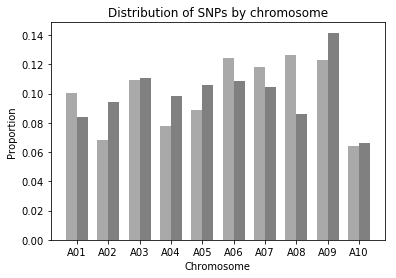

In [27]:
# Make a side-by-side bar plot showing the distribution of SNPs found on each chromosome
# for the R09 and S11 genome mappings.
ind = np.arange(len(R09_SNP_per_chromosome_pct)) # the x locations for the groups
width = 0.35                                    # the width of the bars
fig, ax = plt.subplots()
R09_rects = ax.bar(ind, R09_SNP_per_chromosome_pct.values(), width, color='darkgray')
S11_rects = ax.bar(ind+width, S11_SNP_per_chromosome_pct.values(), width, color='gray')
ax.set_title('Distribution of SNPs by chromosome')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(list(R09_SNP_per_chromosome_pct), rotation=0)
ax.set_xlabel('Chromosome')
ax.set_ylabel('Proportion')

#def autolabel(rects):
#    """
#    Attach a text label above each bar displaying its height
#    """
#    for rect in rects:
#        height = rect.get_height()
#        ax.text(rect.get_x() + rect.get_width()/2., height,
#                '{}'.format(int(height)),
#                ha='left', va='bottom', rotation=45)

#autolabel(R09_rects)
#autolabel(S11_rects)

plt.savefig('SNPs_by_chromosome.png', dpi=300, bbox_inches='tight')
plt.show()

In [28]:
# For Indel length distributions we can use previously created R09_INDELS and S11_INDELS
R09_INDEL_sizes = dict()
for ref, alt_list in zip(R09_INDELS.REF.apply(len), R09_INDELS.ALT.apply(str.split, args=(','))):
    for alt in alt_list:
        delta = ref - len(alt)
        if delta in R09_INDEL_sizes:
            R09_INDEL_sizes[delta] += 1
        else:
            R09_INDEL_sizes[delta] = 1

S11_INDEL_sizes = dict()
for ref, alt_list in zip(S11_INDELS.REF.apply(len), S11_INDELS.ALT.apply(str.split, args=(','))):
    for alt in alt_list:
        delta = ref - len(alt)
        if delta in S11_INDEL_sizes:
            S11_INDEL_sizes[delta] += 1
        else:
            S11_INDEL_sizes[delta] = 1


In [29]:
# Convert to percentages to plot distribution
R09_INDEL_sizes_pct = {key: R09_INDEL_sizes[key]/sum(R09_INDEL_sizes.values()) for key in R09_INDEL_sizes}
S11_INDEL_sizes_pct = {key: S11_INDEL_sizes[key]/sum(S11_INDEL_sizes.values()) for key in S11_INDEL_sizes}

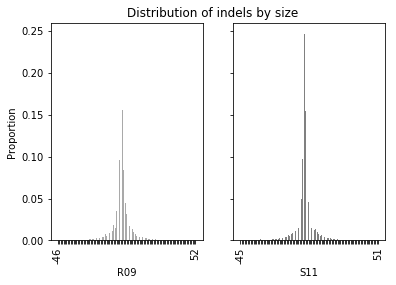

In [30]:
# Plot the calculated size distributions of indels for each genome using
ind1 = np.arange(len(R09_INDEL_sizes_pct)) # the x locations for R09
ind2 = np.arange(len(S11_INDEL_sizes_pct)) # the x locations for S11
width = 0.5                                # the width of the bars
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True) # Two plots side by side sharing the y-axis

R09_rects = ax1.bar(ind1, [R09_INDEL_sizes_pct[k] for k in sorted(R09_INDEL_sizes_pct.keys())], width, color='darkgray')
ax1.set_xticks(ind1)
R09_ticks = sorted(R09_INDEL_sizes_pct.keys())
ax1.set_xticklabels([min(R09_ticks)]+['' for i in range(len(ind1)-2)]+[max(R09_ticks)], ha='center', rotation=90)

S11_rects = ax2.bar(ind2, [S11_INDEL_sizes_pct[k] for k in sorted(S11_INDEL_sizes_pct.keys())], width, color='gray')
ax2.set_xticks(ind2)
S11_ticks = sorted(S11_INDEL_sizes_pct.keys())
ax2.set_xticklabels([min(S11_ticks)]+['' for i in range(len(ind2)-2)]+[max(S11_ticks)], ha='center', rotation=90)

ax1.set_title('Distribution of indels by size', ha='left')
ax1.set_xlabel('R09')
ax2.set_xlabel('S11')
ax1.set_ylabel('Proportion')

#ax.set_yticks(np.arange(0,1.1,0.2))
#def autolabel(rects):
#    """
#    Attach a text label above each bar displaying its height
#    """
#    for rect in rects:
#        height = rect.get_height()
#        ax.text(rect.get_x() + rect.get_width()/2., height,
#                '{}'.format(height),
#                ha='left', va='bottom', rotation=45)
#
#autolabel(R09_rects)
#autolabel(S11_rects)
plt.savefig('Indels_by_size.png', dpi=300, bbox_inches='tight')
plt.show()